# Final Exam

In [1]:
import numpy as np
import sympy as sm
from sympy import UnevaluatedExpr as uneval
from IPython.display import display, Math
from sympy.physics.vector.printing import vlatex

## Part 1: Equations of Motion for Simulating Dynamics

###  1.1 (3 points) Using the configuration variable q = x1, find the kinetic energy of the system.

In [2]:
# define variables
t = sm.symbols(r't')
x1 = sm.symbols(r'x_1', cls=sm.Function)
x1 = x1(t)
x1d, x1dd = x1.diff(t), x1.diff(t, 2)

k1, k2, c, m = sm.symbols(r'k_1 k_2 c m', real=True, positive=True)

In [3]:
# define kinetic energy
K = uneval(sm.Rational(1,2)) * uneval(m * x1d**2)

print('Kinetic energy: ')
display(Math(r'K = ' + vlatex(K)))

Kinetic energy: 


<IPython.core.display.Math object>

### 1.2 (3 points) Find the potential energy for the system.

In [4]:
V_spring = sm.Rational(1,2) * k1 * x1**2 + sm.Rational(1,4) * k2 * x1**4

print('Potential energy of spring:')
display(Math(r'V_{spring} = ' + vlatex(V_spring)))

Potential energy of spring:


<IPython.core.display.Math object>

In [5]:
# define other potential energy (ignore offset, assume datum is at equilibrium)
g = sm.symbols(r'g', real=True, positive=True)

P_mass = m*g*-x1

print('Potential energy of mass (sign is negative because x1 points down)')
display(Math(r'P_{mass} = ' + vlatex(P_mass)))

Potential energy of mass (sign is negative because x1 points down)


<IPython.core.display.Math object>

In [6]:
# find total potential energy
P = V_spring + P_mass

display(Math(r'P = ' + vlatex(P)))

<IPython.core.display.Math object>

###  1.3 (3 points) Find the Lagrangian $L = K −P$.

In [7]:
# Determine the lagrangian
L = K - P
L = L.simplify()

display(Math(r'L = ' + vlatex(L)))

<IPython.core.display.Math object>

###  1.4 (3 points) Find the generalized forces $\tau - B\dot q$.

In [8]:
F, b = sm.symbols(r'F b')

f_nonlinearfric = c*sm.sign(x1d)

tau = F
Bqdot = b*x1d + f_nonlinearfric

display(Math(r'\tau = ' + vlatex(tau) +\
             r', \quad B \dot q =' + vlatex(Bqdot)))

print('Non generalized forces:')
display(Math(r'\tau - B \dot q = ' + vlatex(tau - Bqdot)))


<IPython.core.display.Math object>

Non generalized forces:


<IPython.core.display.Math object>

###  1.5 (8 points) Derive the equations of motion using the Euler-Lagrange equations.

In [9]:
def derive_Lagrangian(L, q, q_dot):
    term_1 = (L.diff(q_dot)).diff(t)
    term_2 = L.diff(q)
    return term_1 - term_2

In [10]:
# Solve the lagrangian (EL for Euler Lagrange)
EL = sm.Eq(derive_Lagrangian(L, x1, x1d), tau - Bqdot)

print('Equations of motion derived by Euler-Lagrange:')
display(Math(r'\text{EOM}:' + vlatex(EL)))

Equations of motion derived by Euler-Lagrange:


<IPython.core.display.Math object>

## Part 2: Models for Control Design

The figure below shows a mass on a fixed inclined plane connected to a nonlinear spring and a linear damper and
 the equation of motion is the following:

 $$
m \ddot z + k_1 z + k_2 z^3 - \frac{1}{\sqrt{2}} m g = F - b \dot z
 $$

 The damping coefficient is $b = 0.1$. The physical parameters of the system are $g = 9.8$ meters per second,
 $\theta =45$ degrees, $m = 0.5 kg$, $k_1 = 0.05$, and $k_2 = 0.02$. The input force $F$ is limited to $\pm 5.0$ Newtons.

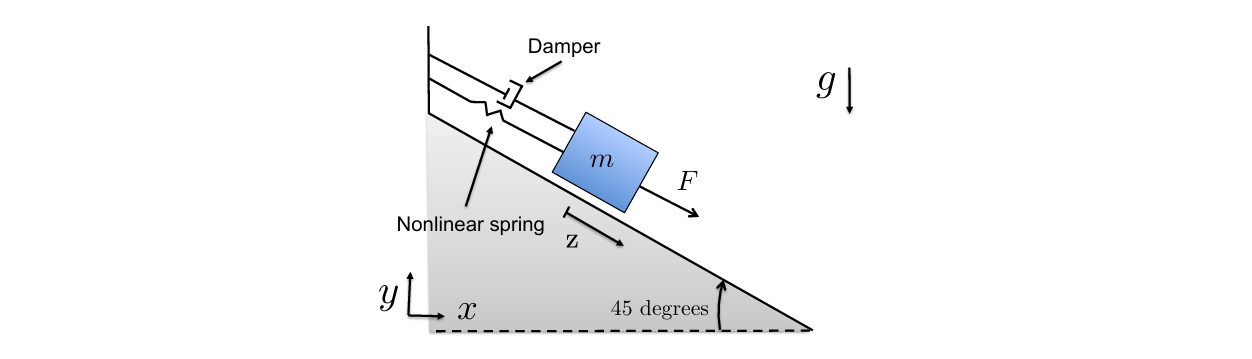

 For this problem, use the following files to implement the simulation: ```finalSim2.py```, ```massDynamics.py```. The
 objective of this part is to use the equations of motion to find the appropriate models that will be used to
 design the feedback control strategies. If you CANNOT get the dynamics to work, you can instead use the file
 “massDynamicsCompiled.py,” but you will take a 10 point deduction by using that file instead of writing your
 own dynamics for the rest of the exam.

### 2.1 (3 points) Suppose that the objective is to linearize the system around the equilibrium position $z_e$. Find the associated equilibrium force $F_e$ so that $z_e$ is an equilibrium of the system.

### 2.2 (6 points) Create a “controller”: 
(At this point it is mostly just a simulation of the equilibrium conditions) that places a constant force of Fe on the physical system. In the simulation files, set the initial conditions
 to z(0) = ze and ˙ z(0) = 0 to verify that the equilibrium force is correct. For this problem you may assume
 that ze = 0. Insert a plot of the output of the system with initial condition z(0) = ze = 0 and an
 input of Fe in the associated Word document.

###  (5 points) Linearize the model around the equilibrium $(z_e, F_e)$, for $z_e= 0$ and report your linearized model.

In [15]:
# redefine eom
z = sm.symbols(r'z', cls=sm.Function)
z = z(t)
zd, zdd = z.diff(t), z.diff(t, 2)

eom = sm.Eq(m*zdd + k1*z + k2*z**3 - 1/sm.sqrt(2) * m*g, F - b*zd)
print('equations of motion')
display(Math(vlatex(eom)))

print('solve for F')
eom_F = sm.solve(eom, F)[0]
display(Math(r'F=' + vlatex(eom_F)))

equations of motion


<IPython.core.display.Math object>

solve for F


<IPython.core.display.Math object>

Taylor series approximaiton:

$$
g(w) \approx g(w_0) + \frac{\partial g}{\partial w} \bigg|_{w_0} (w - w_0)
$$

In [24]:
# take the taylor series approximation
ze = sm.symbols(r'z_e', real=True)

eom_equib = eom_F.subs({z: ze}) + sm.diff(eom_F, z).subs({z: ze}) * (z - ze)
eom_equib = eom_equib.simplify()

eom_equib = eom_equib.collect([z, ze])

print('equilibrium equation:')
display(Math(r'F_e = ' + vlatex(eom_equib)))

print('finally, sub in ze = 0:')

eom_equib = eom_equib.subs({ze: 0})
display(Math(r'F_e = ' + vlatex(eom_equib)))

equilibrium equation:


<IPython.core.display.Math object>

finally, sub in ze = 0:


<IPython.core.display.Math object>

###  2.4 (3 points) Find the transfer function of the linearized model when $z_e = 0$.